In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('C:/Users/naras/Downloads/boston.csv')

In [7]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [8]:
df.tail()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...
504,0.04741 0.00 11.930 0 0.5730 6.0300 80...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [11]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)
data = california.frame

# Features and Target
X = data.drop('MedHouseVal', axis=1)  # Features (independent variables)
y = data['MedHouseVal']  # Target (median house value)


In [12]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Make predictions
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.555891598695244
R-squared Score: 0.5757877060324511


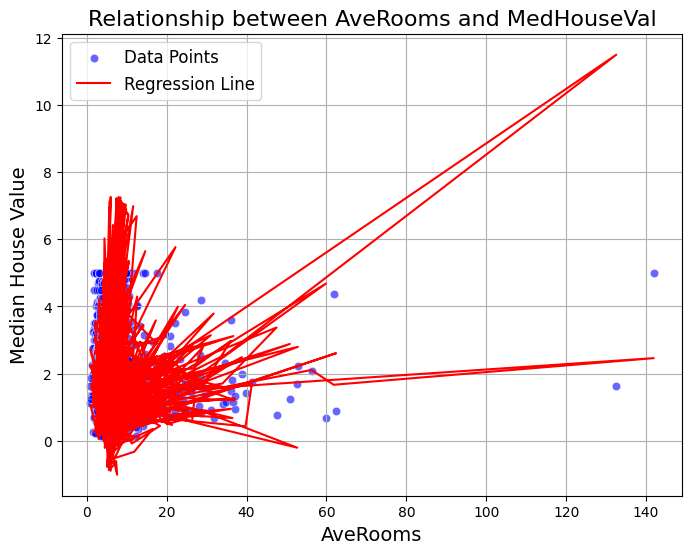

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick a single feature (e.g., 'AveRooms') for visualization
feature = 'AveRooms'

# Scatter plot of the feature vs. target
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[feature], y=y, alpha=0.6, color='blue', label='Data Points')

# Plot regression line
plt.plot(X[feature], model.predict(X), color='red', label='Regression Line')

# Add labels and legend
plt.title(f'Relationship between {feature} and MedHouseVal', fontsize=16)
plt.xlabel(feature, fontsize=14)
plt.ylabel('Median House Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


C:\Users\naras\AppData\Local\Temp\ipykernel_16244\3082608960.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


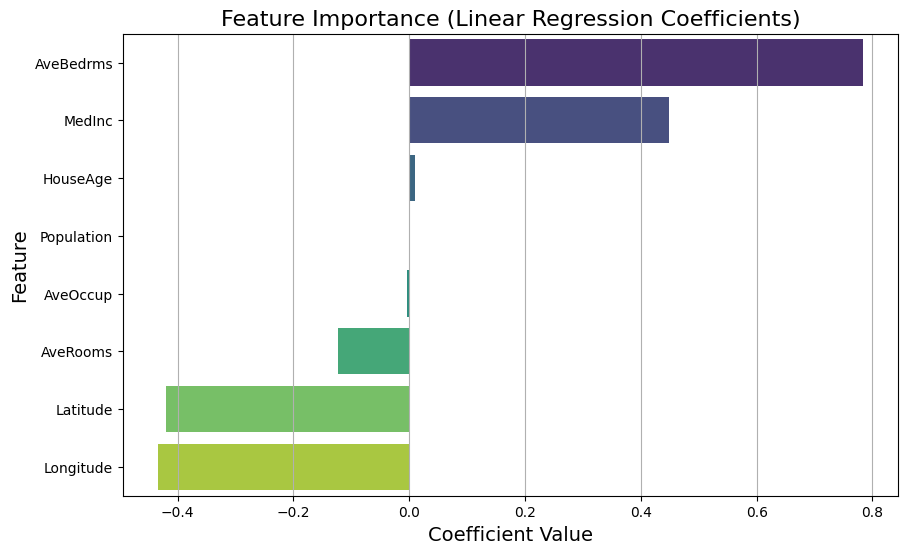

In [18]:
# Extract coefficients from the linear regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')

# Add labels
plt.title('Feature Importance (Linear Regression Coefficients)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x')
plt.show()


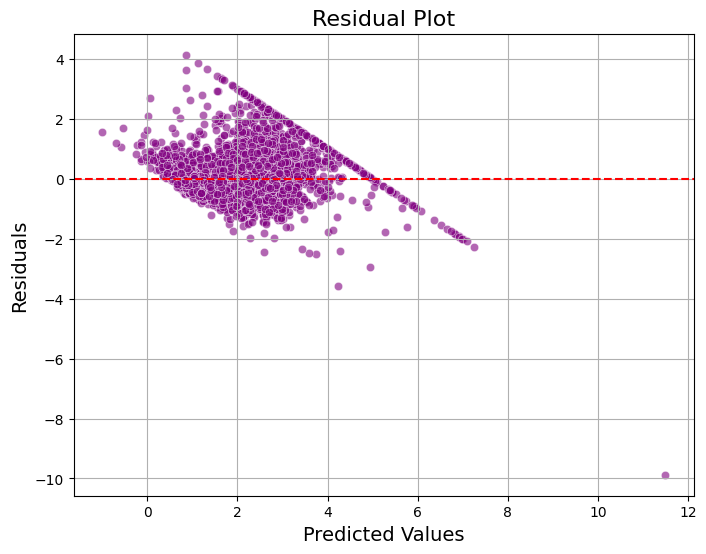

In [19]:
# Calculate residuals
residuals = y_test - model.predict(X_test)

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.predict(X_test), y=residuals, alpha=0.6, color='purple')

# Add horizontal line at residual = 0
plt.axhline(y=0, color='red', linestyle='--')

# Add labels and title
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)
plt.show()


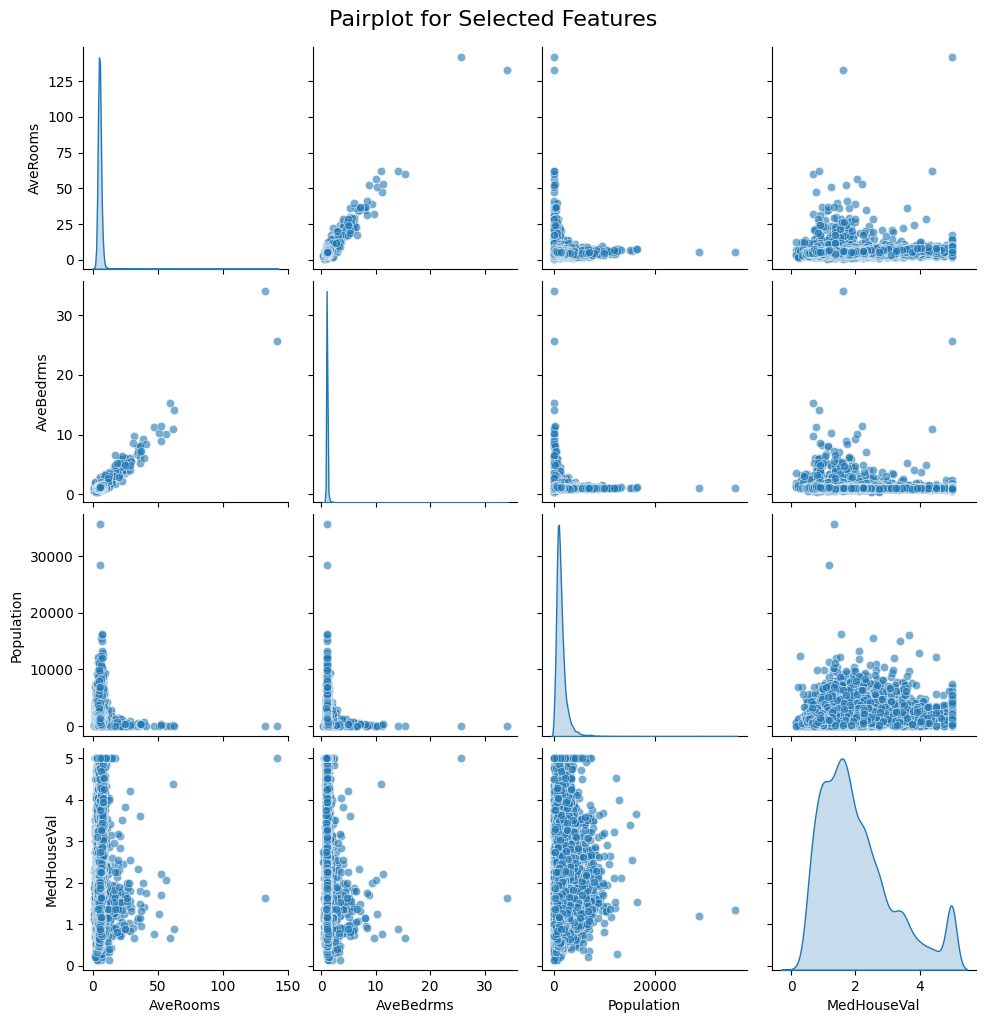

In [20]:
# Pairplot for selected features
selected_features = ['AveRooms', 'AveBedrms', 'Population', 'MedHouseVal']

sns.pairplot(data[selected_features], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot for Selected Features", y=1.02, fontsize=16)
plt.show()


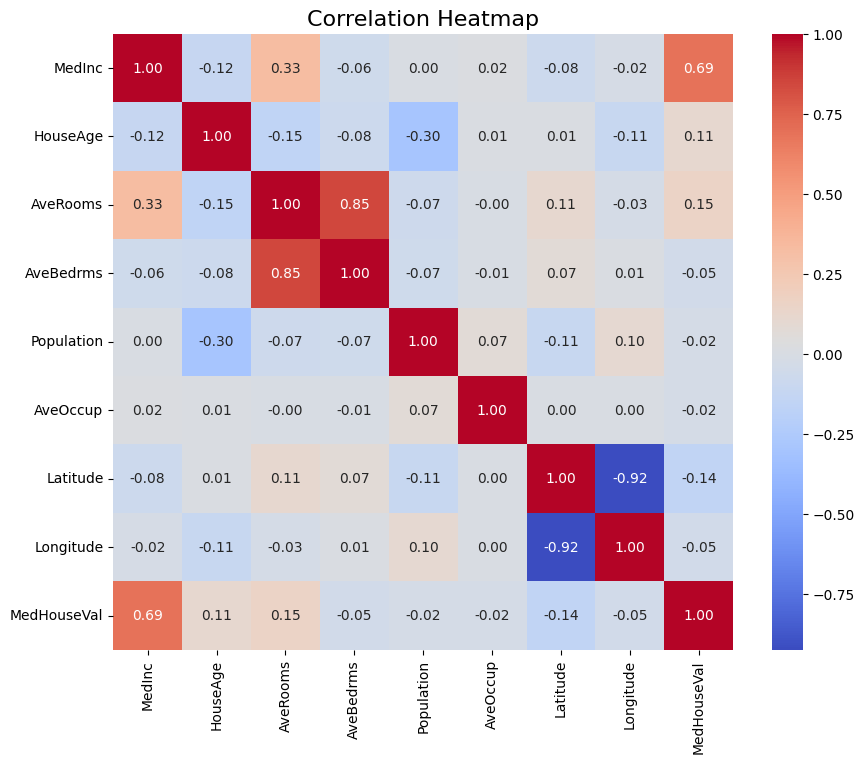

In [21]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


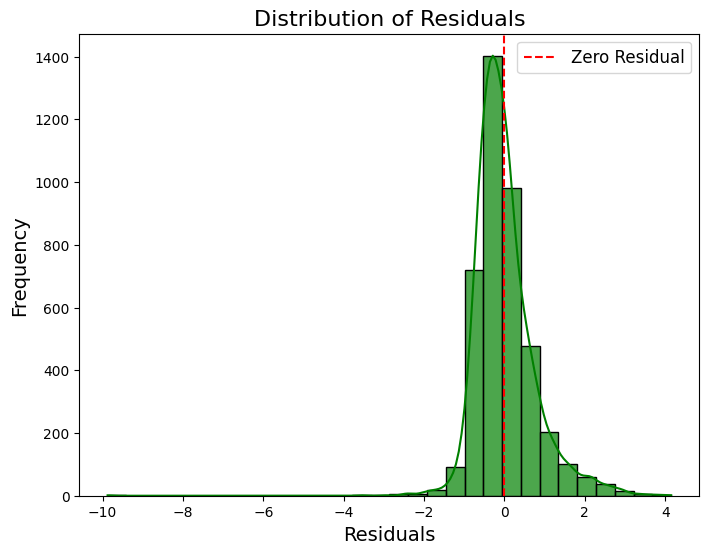

In [22]:
# Residuals (difference between actual and predicted values)
residuals = y_test - model.predict(X_test)

# Distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green', bins=30, alpha=0.7)

# Add labels
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual')
plt.legend(fontsize=12)
plt.show()


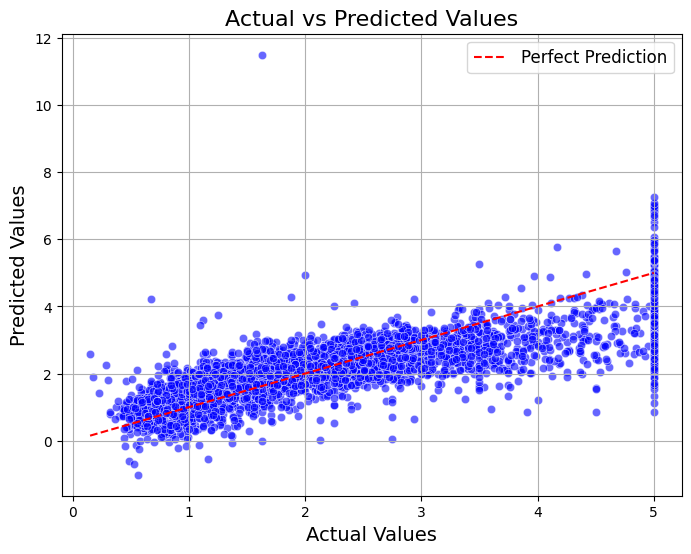

In [23]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=model.predict(X_test), alpha=0.6, color='blue')

# Add line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Add labels
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Display scores
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R²:", cv_scores.mean())
print("Standard Deviation of R²:", cv_scores.std())


Cross-Validation R² Scores: [0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
Mean R²: 0.5530311140279577
Standard Deviation of R²: 0.061691601409532316


In [26]:
# Adjusted R² formula
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
r2 = r2_score(y_test, model.predict(X_test))

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R²:", adjusted_r2)


Adjusted R²: 0.5749637928613561


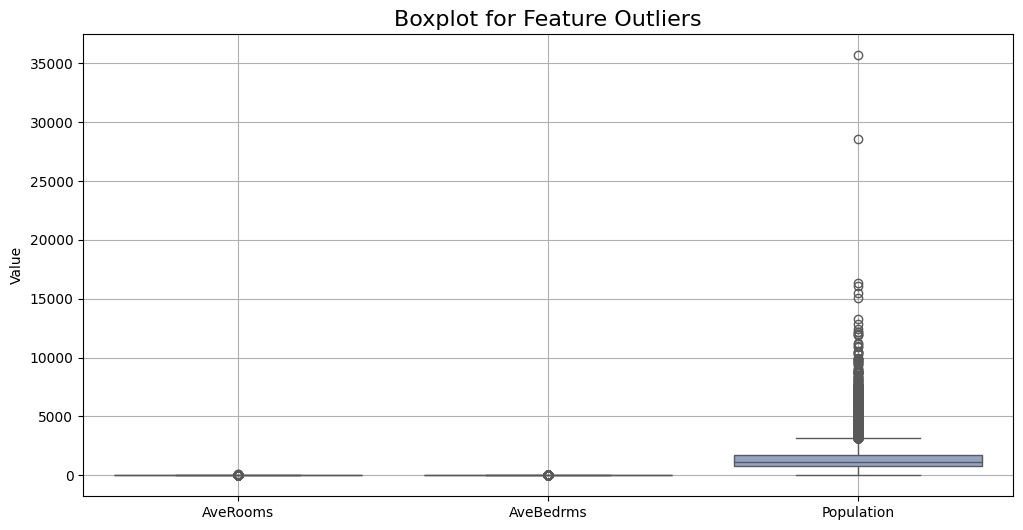

In [27]:
# Boxplot for selected features
plt.figure(figsize=(12, 6))
sns.boxplot(data=X[['AveRooms', 'AveBedrms', 'Population']], palette='Set2')
plt.title('Boxplot for Feature Outliers', fontsize=16)
plt.ylabel('Value')
plt.grid(True)
plt.show()
